<a href="https://colab.research.google.com/github/SyedHuzaifa007/The-Sparks-Foundation-Task-2/blob/main/Iris_Prediction_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries And Modules 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [23]:
# Loading The Iris Dataset
path = '/content/drive/MyDrive/Sparks Foundation Internship/Datasets/Iris.csv'
iris = pd.read_csv(path)
iris_df = pd.DataFrame(iris)
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
# Finding The Optimum Number of Clusters For K-Means CLassification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

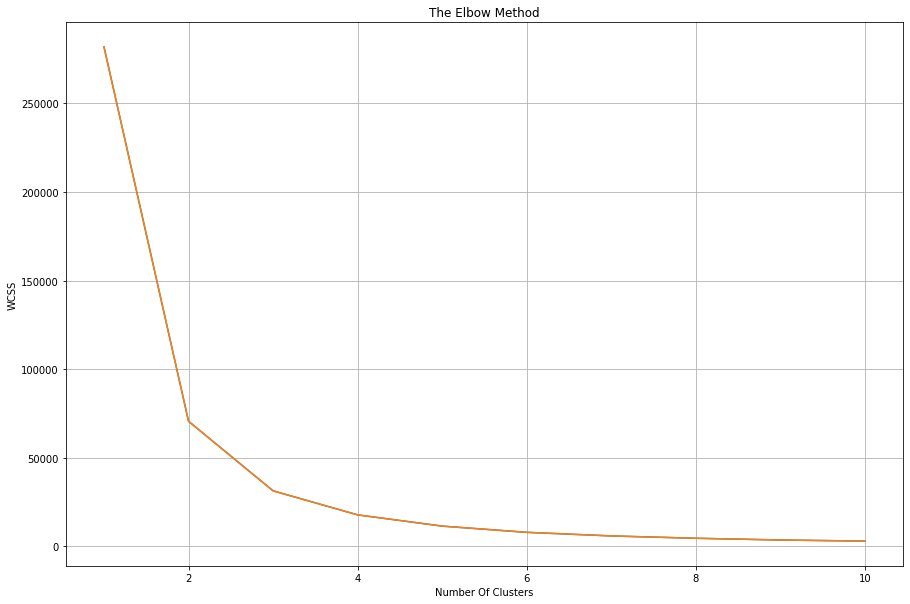

In [37]:
plt.figure(figsize=(15, 10))
# PLotting The Results On A Line Graph To Observe Elbow
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')

# Sum of Squares Within Clusters
plt.plot(range(1, 11), wcss)
plt.ylabel('WCSS') 
plt.grid()
plt.show()

In [9]:
# Applying K-Means Algorithm And Creating K-Means Classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',  max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

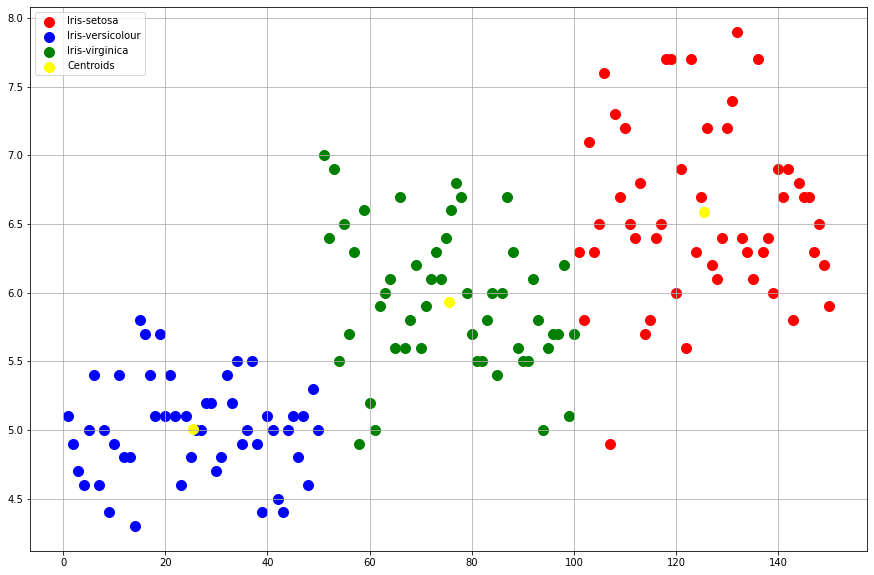

In [30]:
plt.figure(figsize=(15, 10))
# Visualising The Clusters (On The First Two Columns)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# PLotting The Centeroids Of The Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.grid()
plt.legend()